In [32]:
import pandas as pd
import numpy as np
import math
import operator

In [33]:
col=['sepal_length','sepal_width','petal_length','petal_width','Name']
iris=pd.read_csv("iris.data",names=col)
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width         Name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [34]:
iris1 = iris.drop('Name', axis = 'columns')
iris1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Create X train and Y train

In [35]:
x1_data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalization Method I

In [36]:
x1_data = x1_data.apply(lambda x: (x - x.min(axis=0))/ (x.max(axis=0) -x.min(axis=0)))
x1_data.head()


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Normalization Method II¶

In [37]:
from sklearn.preprocessing import MinMaxScaler
x2_data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = MinMaxScaler()
scaler.fit(x2_data)
iris2 = scaler.transform(x2_data)


In [38]:
iris2

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

# Distance Metric Use the Euclidean distance metric for calculating distance between 2 arrays

In [39]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    print(length)
    for x in range(len(trainingSet)):
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
       
 
#shorting
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    print(sorted_d[:5])
    print(sorted_d1[:5])
    neighbors = []
    
# taking 5 neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    
#finding class
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
  
    print(counts)
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return(sortedVotes[0][0], neighbors)

# Nearest Neighbours and Prediction using KNN 

In [40]:
testSet1 = [[5.1, 2.5, 3.2, 4.3]]
test = pd.DataFrame(testSet1)
result,neigh = knn(iris, test, 5)
print("And the flower is:",result)
print("the neighbors are:",neigh)

testSet2 = [[4.9, 3, 1.4, 0.2]]
test = pd.DataFrame(testSet2)
result,neigh = knn(iris, test, 5)
print("And the flower is:",result)
print("the neighbors are:",neigh)

testSet3 = [[6, 3, 4.8, 1.8]]
test = pd.DataFrame(testSet3)
result,neigh = knn(iris, test, 5)
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(114, 2.792848008753788), (106, 2.9137604568666924), (121, 2.9189039038652846), (113, 2.9816103031751147), (59, 2.9916550603303182)]
[(0, 4.588027898781785), (1, 4.509988913511872), (2, 4.5902069670114), (3, 4.5066617356975), (4, 4.611941023040083)]
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 4}
[('Iris-virginica', 4), ('Iris-versicolor', 1), ('Iris-setosa', 0)]
And the flower is: Iris-virginica
the neighbors are: [114, 106, 121, 113, 59]
4
[(1, 0.0), (45, 0.14142135623730986), (12, 0.1414213562373099), (9, 0.17320508075688784), (34, 0.17320508075688784)]
[(0, 0.5385164807134502), (1, 0.0), (2, 0.30000000000000016), (3, 0.3316624790355407), (4, 0.608276253029822)]
{'Iris-setosa': 5, 'Iris-versicolor': 0, 'Iris-virginica': 0}
[('Iris-setosa', 5), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: Iris-setosa
the neighbors are: [1, 45, 12, 9, 34]
4
[(138, 0.0), (127, 0.14142135623730964), (70, 0.22360679774997896), (126, 0.2828427124746193), (149, 0.31622

# Accuracy

In [41]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #taking 25% test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

#  K Means Algorithm

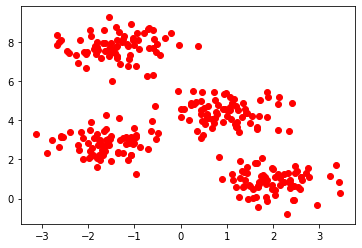

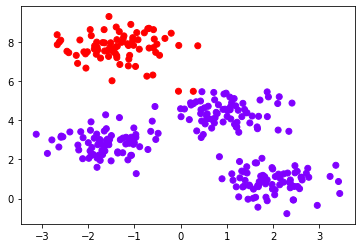

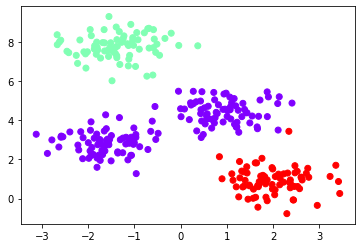

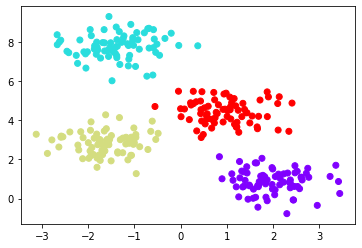

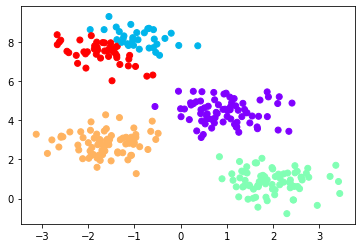

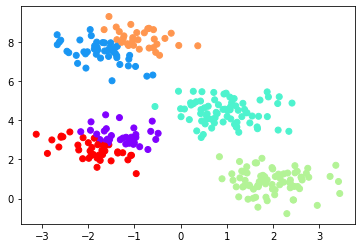

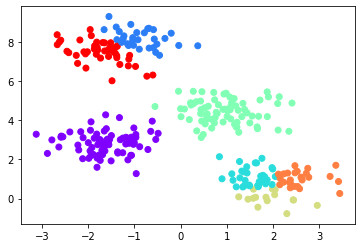

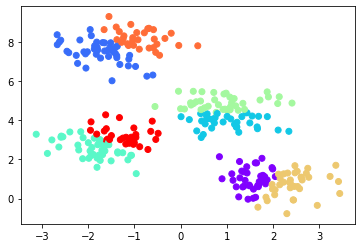

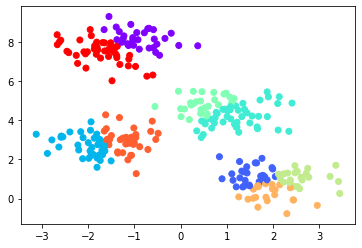

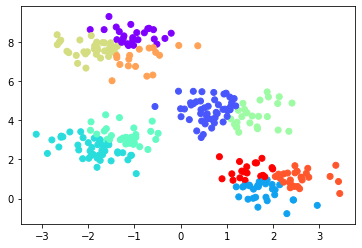

In [42]:
import matplotlib.pyplot as plt 
import numpy as np
from numpy import genfromtxt
from sklearn.cluster import KMeans
def manpreet():
    csvnp = genfromtxt('dataset.csv', delimiter=',')
    x=np.empty([len(csvnp)-1])
    y=np.empty([len(csvnp)-1])
    pnt=np.empty([len(x),2])
    for i in range(1,len(csvnp)):
        x[i-1]=csvnp[i,1]
        y[i-1]=csvnp[i,2]
    for j in range(len(x)):
        pnt[j,0]=x[j]
        pnt[j,1]=y[j]
        
    plot1=plt.figure(1)
    plt.scatter(x[:],y,c='r')
    for k in range(2,11):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(pnt)
        plot2=plt.figure(k)
        plt.scatter(pnt[:,0],pnt[:,1], c = kmeans.labels_, cmap='rainbow')
    plt.show()
manpreet()